In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

In [45]:
data.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,"[0.0, 1.0, 0.0, 0.0]",1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,"[1.0, 0.0, 0.0, 0.0]",1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,"[1.0, 0.0, 0.0, 0.0]",1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,"[1.0, 0.0, 0.0, 0.0]",1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,"[1.0, 0.0, 0.0, 0.0]",4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [47]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder 객체 생성
ohencoder = OneHotEncoder(sparse_output=False)

# 원-핫 인코딩 수행
encoded_data = ohencoder.fit_transform(data[['주거 형태']])

# 원-핫 인코딩된 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=ohencoder.categories_[0])

# 원본 데이터의 '주거 형태' 열을 원-핫 인코딩된 값으로 대체
# 주거 형태를 0과 1로 구성된 행렬로 변환
data['주거 형태'] = encoded_df.apply(lambda row: row.tolist(), axis=1)

# 결과 확인
print(data)


              UID                 주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  \
0     TRAIN_00000  [0.0, 1.0, 0.0, 0.0]  1941337.5      10년 이상          0.0   
1     TRAIN_00001  [1.0, 0.0, 0.0, 0.0]  1979505.0      10년 이상          0.0   
2     TRAIN_00002  [1.0, 0.0, 0.0, 0.0]  1356381.0          4년          0.0   
3     TRAIN_00003  [1.0, 0.0, 0.0, 0.0]  1049017.5          6년          0.0   
4     TRAIN_00004  [1.0, 0.0, 0.0, 0.0]  4320217.5          2년          0.0   
...           ...                   ...        ...         ...          ...   
9995  TRAIN_09995  [0.0, 0.0, 1.0, 0.0]  1339473.0      10년 이상          0.0   
9996  TRAIN_09996  [0.0, 0.0, 1.0, 0.0]  2297230.5          2년          0.0   
9997  TRAIN_09997  [0.0, 0.0, 1.0, 0.0]  1221523.5      10년 이상          0.0   
9998  TRAIN_09998  [0.0, 1.0, 0.0, 0.0]  3343584.0      10년 이상          0.0   
9999  TRAIN_09999  [0.0, 0.0, 1.0, 0.0]  2175133.5          5년          0.0   

      개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  

In [35]:
data['주거 형태'].unique()

array([0., 1.])

In [30]:
type(ohencoder.categories_[0])

numpy.ndarray

c:\Users\302-28\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\302-28\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


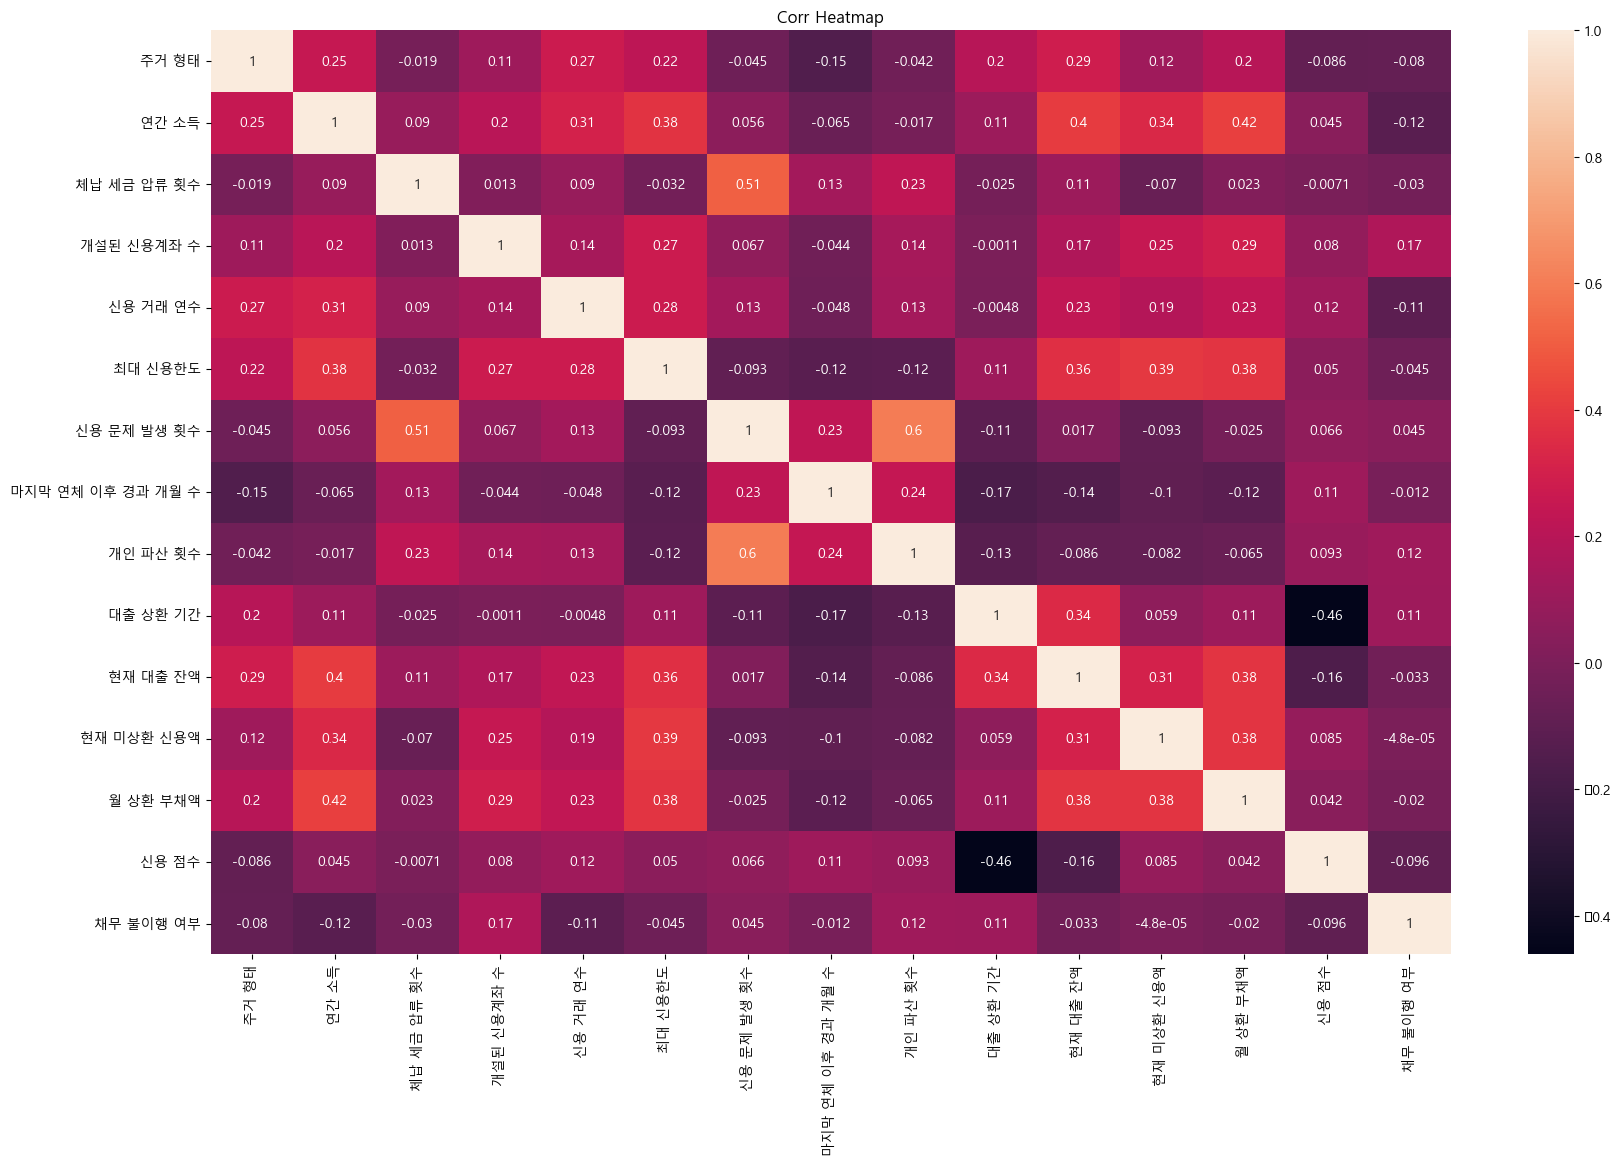

In [ ]:
data.drop(['UID', '현재 직장 근속 연수','대출 목적'], axis =1, inplace=True)


data['주거 형태'] = encoder_house_type.fit_transform(data['주거 형태'])

data['대출 상환 기간'] = encoder_loan_pd.fit_transform(data['대출 상환 기간'])


corr = data.corr()
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True)
plt.title('Corr Heatmap')
plt.show()

연간 소득, 개설된 신용계좌 수, 신용 거래 연수, 개인 파산 횟수
대출 상한 기간

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

real_test = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\test.csv")

In [54]:
data.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


c:\Users\302-28\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\302-28\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


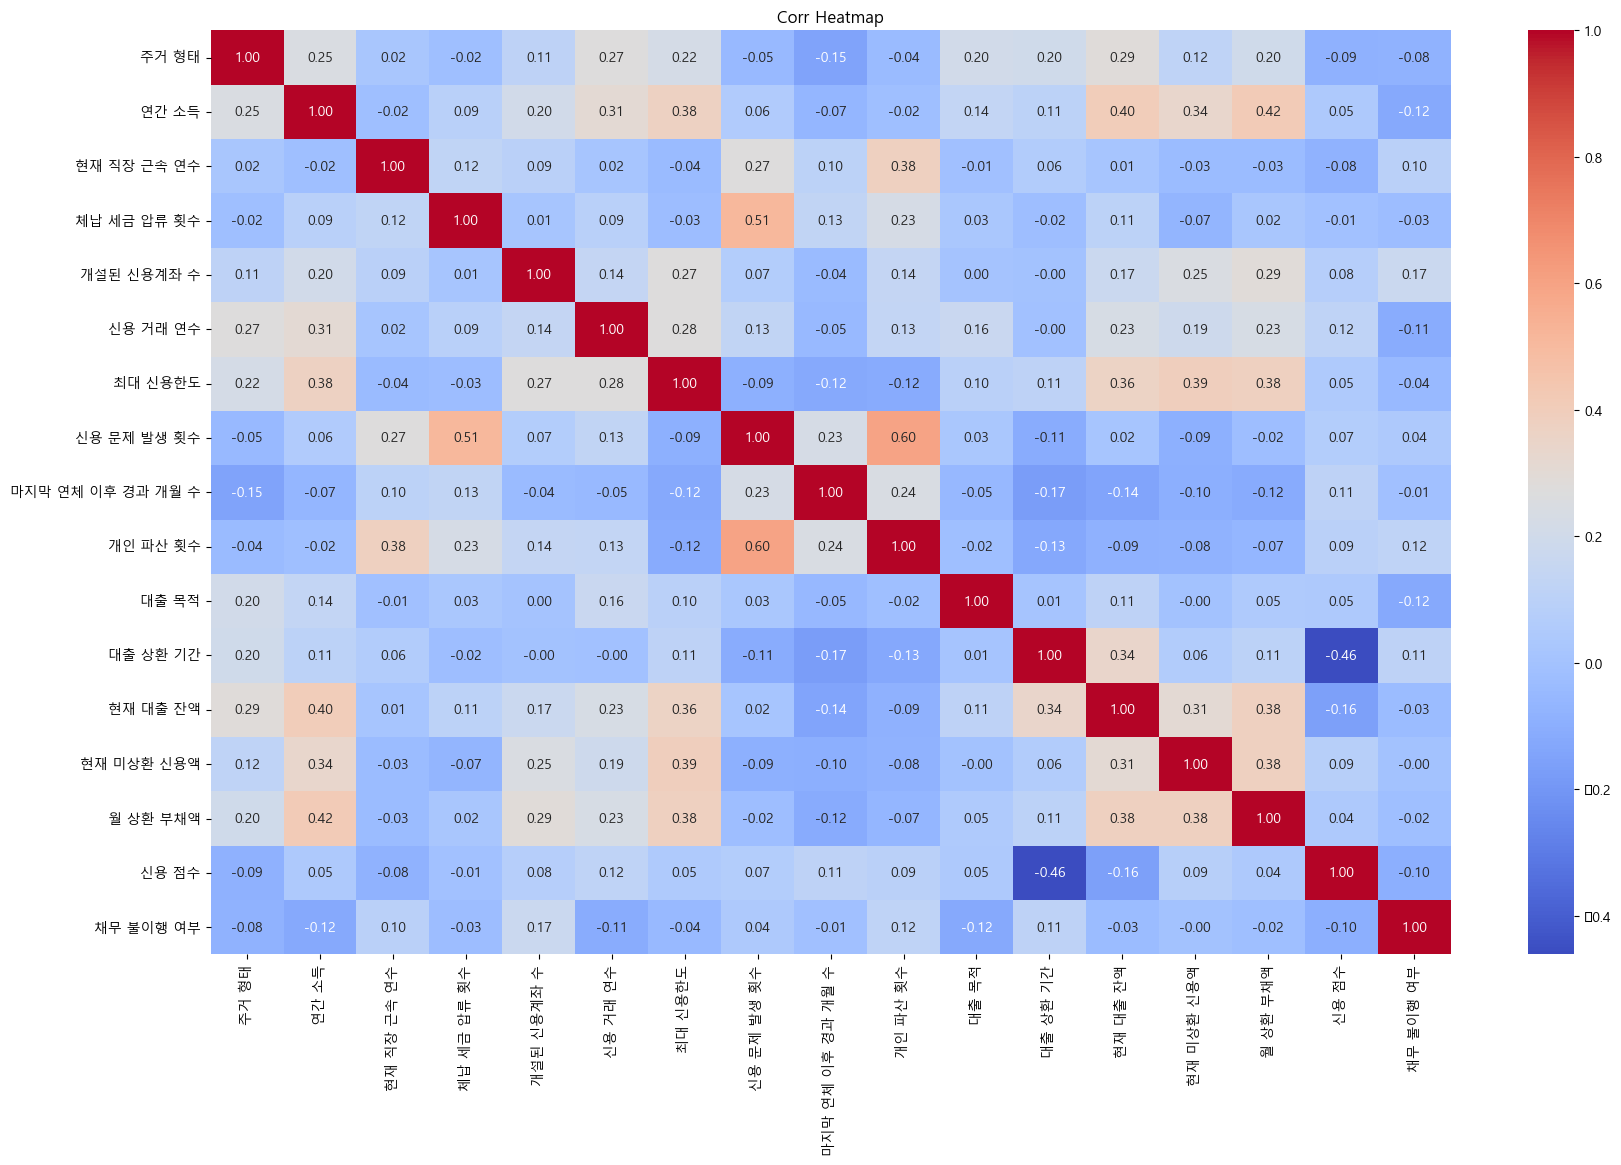

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv").drop(['UID'], axis=1)

# 범주형 열 지정
categorical_col = [
    '주거 형태',
    '대출 목적',
    '대출 상환 기간',
    '현재 직장 근속 연수'
]

# LabelEncoder를 이용한 범주형 변수 변환
encoder = LabelEncoder()
data[categorical_col] = data[categorical_col].apply(encoder.fit_transform)

# 상관 행렬 계산
corr = data.corr()

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 히트맵 그리기
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Corr Heatmap')
plt.show()


연간 소득, 현재 직장 근속 연수, 개설된 신용계좌 수, 신용 거래 연수, 개인 파산 횟수, 대출 목적, 대출 상환 기간

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

real_test = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\test.csv")

categorical_col = [
    '주거 형태',
    '현재 직장 근속 연수',
    '대출 목적',
    '대출 상환 기간'
]

ohencoder = OneHotEncoder(sparse_output=False)
ohencoder.fit(data[categorical_col])

train_encoder = ohencoder.transform(data[categorical_col])
test_encoder = ohencoder.transform(real_test[categorical_col])

train_encoder_df = pd.DataFrame(train_encoder, columns=ohencoder.get_feature_names_out(categorical_col))
test_encoder_df = pd.DataFrame(test_encoder, columns=ohencoder.get_feature_names_out(categorical_col))

train_df = pd.concat([data.drop(columns=categorical_col).reset_index(drop=True), train_encoder_df], axis=1)
test_df = pd.concat([real_test.drop(columns=categorical_col).reset_index(drop=True), test_encoder_df], axis=1)

In [31]:
train_df.columns

Index(['UID', '연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '주거 형태_월세', '주거 형태_자가',
       '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)', '현재 직장 근속 연수_10년 이상',
       '현재 직장 근속 연수_1년', '현재 직장 근속 연수_1년 미만', '현재 직장 근속 연수_2년',
       '현재 직장 근속 연수_3년', '현재 직장 근속 연수_4년', '현재 직장 근속 연수_5년', '현재 직장 근속 연수_6년',
       '현재 직장 근속 연수_7년', '현재 직장 근속 연수_8년', '현재 직장 근속 연수_9년', '대출 목적_결혼 자금',
       '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합', '대출 목적_사업 대출',
       '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비', '대출 목적_이사 비용',
       '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매', '대출 목적_휴가 비용',
       '대출 상환 기간_단기 상환', '대출 상환 기간_장기 상환'],
      dtype='object')

연간 소득, 현재 직장 근속 연수, 개설된 신용계좌 수, 신용 거래 연수, 개인 파산 횟수, 대출 목적, 대출 상환 기간

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(X,y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7228


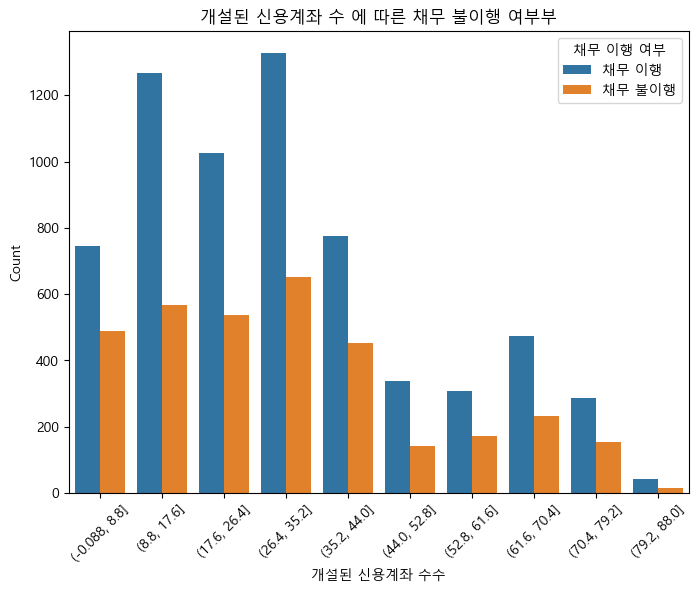

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

data['현재 미상환 신용액 구간'] = pd.cut(data['마지막 연체 이후 경과 개월 수'], bins=10)

# countplot을 사용하여 현재 미상환 신용액 구간별 채무 불이행 여부 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='현재 미상환 신용액 구간', hue='채무 불이행 여부', data=data)
plt.title('개설된 신용계좌 수 에 따른 채무 불이행 여부부')
plt.xlabel('개설된 신용계좌 수수')
plt.ylabel('Count')
plt.legend(title='채무 이행 여부', labels=['채무 이행', '채무 불이행'])
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


In [5]:
data.head(10)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
5,TRAIN_00005,주택 담보 대출 (거주 중),5395734.0,10년 이상,1.0,12,35.6,1297161.0,2,33,0,부채 통합,단기 상환,562845.0,545880.0,23272.5,691,1
6,TRAIN_00006,자가,1601410.5,8년,0.0,17,32.6,1174611.0,1,74,3,부채 통합,단기 상환,252634.5,235188.0,3751.5,795,1
7,TRAIN_00007,주택 담보 대출 (거주 중),1410700.5,2년,0.0,8,24.4,692352.0,0,19,0,자동차 구매,장기 상환,479349.0,154974.0,16842.0,807,0
8,TRAIN_00008,주택 담보 대출 (거주 중),1636863.0,3년,0.0,9,9.8,154429.5,0,11,0,기타,단기 상환,370210.5,11943.0,28818.0,713,1
9,TRAIN_00009,자가,1644226.5,2년,0.0,6,12.7,511518.0,0,29,0,부채 통합,단기 상환,187140.0,122344.5,5214.0,793,0


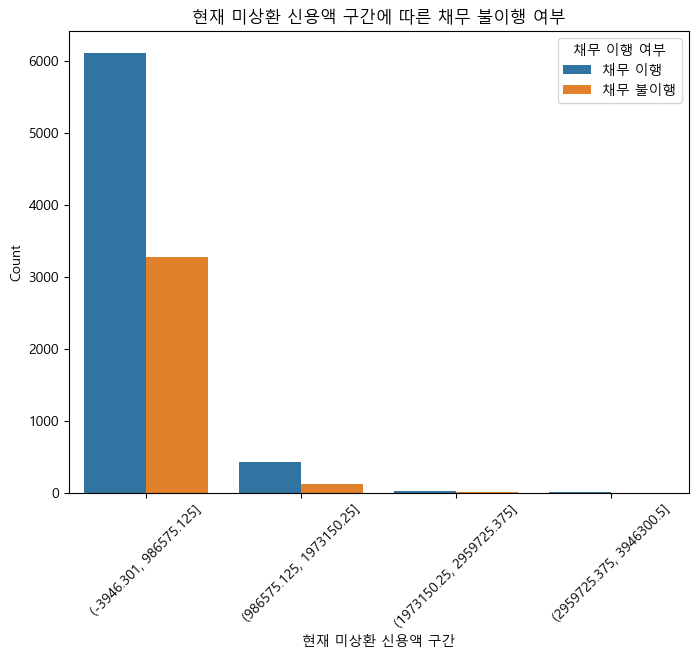

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
dataa = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

# 필요 없는 컬럼 삭제
dataa.drop(['UID', '현재 직장 근속 연수','대출 목적','대출 상환 기간', '주거 형태'], axis=1, inplace=True)

# '현재 미상환 신용액'을 구간화하여 범주형 변수로 변환
# 예시로 구간을 나누는 방법 (필요에 따라 구간을 조정할 수 있음)
dataa['현재 미상환 신용액 구간'] = pd.cut(dataa['현재 미상환 신용액'], bins=4)

# countplot을 사용하여 현재 미상환 신용액 구간별 채무 불이행 여부 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='현재 미상환 신용액 구간', hue='채무 불이행 여부', data=dataa)
plt.title('현재 미상환 신용액 구간에 따른 채무 불이행 여부')
plt.xlabel('현재 미상환 신용액 구간')
plt.ylabel('Count')
plt.legend(title='채무 이행 여부', labels=['채무 이행', '채무 불이행'])
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


In [13]:
data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")
data.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

real_test = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\test.csv")

X = data[['연간 소득', '개설된 신용계좌 수', '현재 대출 잔액', '현재 미상환 신용액', '신용 점수']]

y = data['채무 불이행 여부']

test = real_test[['연간 소득', '개설된 신용계좌 수', '현재 대출 잔액', '현재 미상환 신용액', '신용 점수']]

rmf = RandomForestClassifier(max_depth= 6, min_samples_leaf= 18, min_samples_split= 8, n_estimators= 100)

cross_score = cross_val_score(rmf, X, y, cv= 5)

rmf.fit(X,y)

a = rmf.predict_proba(test)

print(f'교차검증 점수 :{cross_score}')

sample = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\sample_submission.csv")

sample['채무 불이행 확률'] = a[:,1]

sample.to_csv('result_xgb.csv', index= False)

fi=rmf.feature_importances_


교차검증 점수 :[0.6945 0.6935 0.6975 0.702  0.7135]


연간소득, 개설된 신용계좌 수, 현재 대출 잔액, 현재 미상환 신용액, 신용 점수

In [17]:
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': fi
})
print(feature_importance)

                   특성       중요도
0               연간 소득  0.152419
1         체납 세금 압류 횟수  0.003906
2          개설된 신용계좌 수  0.223040
3            신용 거래 연수  0.065097
4             최대 신용한도  0.046793
5         신용 문제 발생 횟수  0.035561
6   마지막 연체 이후 경과 개월 수  0.025546
7            개인 파산 횟수  0.050227
8            현재 대출 잔액  0.134776
9          현재 미상환 신용액  0.120920
10           월 상환 부채액  0.032669
11              신용 점수  0.109047


In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(X,y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6884


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder 객체 생성
ohencoder = OneHotEncoder(sparse_output=False)

# 원-핫 인코딩 수행
encoded_data = ohencoder.fit_transform(data[['주거 형태']])

# 원-핫 인코딩된 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=ohencoder.categories_[0])

# 원본 데이터의 '주거 형태' 열을 원-핫 인코딩된 값으로 대체
# 주거 형태를 0과 1로 구성된 행렬로 변환
data['주거 형태'] = encoded_df.apply(lambda row: row.tolist(), axis=1)

# 결과 확인
print(data)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 예시 DataFrame
df = pd.DataFrame({
    '주거 형태': ['아파트', '단독주택', '빌라', '아파트', '단독주택'],
    '연령': [25, 35, 45, 50, 60],
    '소득': [50000, 60000, 70000, 80000, 90000],
    '구매 여부': [1, 0, 1, 0, 1]  # 타겟 변수 (1: 구매, 0: 미구매)
})

# 1. 원-핫 인코딩 적용
df_encoded = pd.get_dummies(df, columns=['주거 형태'])


In [10]:
df_encoded

,연령,소득,구매 여부,주거 형태_단독주택,주거 형태_빌라,주거 형태_아파트
0,25,50000,1,False,False,True
1,35,60000,0,True,False,False
2,45,70000,1,False,True,False
3,50,80000,0,False,False,True
4,60,90000,1,True,False,False


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 예시 DataFrame
df = pd.DataFrame({
    '주거 형태': ['아파트', '단독주택', '빌라', '아파트', '단독주택'],
    '연령': [25, 35, 45, 50, 60],
    '소득': [50000, 60000, 70000, 80000, 90000],
    '구매 여부': [1, 0, 1, 0, 1]  # 타겟 변수 (1: 구매, 0: 미구매)
})

# 1. 원-핫 인코딩 적용
df_encoded = pd.get_dummies(df, columns=['주거 형태'])

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df_encoded.drop(columns=['구매 여부'])  # 독립 변수
y = df_encoded['구매 여부']  # 종속 변수

# 3. 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 스케일링 (필요할 경우)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 머신러닝 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')


모델 정확도: 0.00%


In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(redata , label)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7111


In [13]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

test = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\test.csv")

redata = data[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '개인 파산 횟수','대출 상환 기간']]

re_real_test = test[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '개인 파산 횟수','대출 상환 기간']]

encoder_loan_pd = LabelEncoder()

redata['대출 상환 기간'] = encoder_loan_pd.fit_transform(redata['대출 상환 기간'])

re_real_test['대출 상환 기간'] = encoder_loan_pd.transform(test['대출 상환 기간'])

label = data['채무 불이행 여부']

xgb = XGBClassifier()

cross_score = cross_val_score(xgb, redata, label, cv = 5)

xgb.fit(redata, label)

a=xgb.predict_proba(re_real_test)

print(f'교차검증 점수 :{cross_score}, 예측 확률 : {a}')

sample = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\sample_submission.csv")

sample['채무 불이행 확률'] = a[:,1]

sample.to_csv('result_xgb.csv', index= False)

C:\Users\302-28\AppData\Local\Temp\ipykernel_14400\3055393723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redata['대출 상환 기간'] = encoder_loan_pd.fit_transform(redata['대출 상환 기간'])
C:\Users\302-28\AppData\Local\Temp\ipykernel_14400\3055393723.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_real_test['대출 상환 기간'] = encoder_loan_pd.transform(test['대출 상환 기간'])


교차검증 점수 :[0.665  0.672  0.6685 0.69   0.683 ], 예측 확률 : [[0.6038022  0.39619777]
 [0.8273459  0.17265409]
 [0.83708405 0.16291593]
 ...
 [0.7124628  0.28753722]
 [0.9078244  0.09217561]
 [0.3945102  0.6054898 ]]


c:\Users\302-28\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\302-28\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


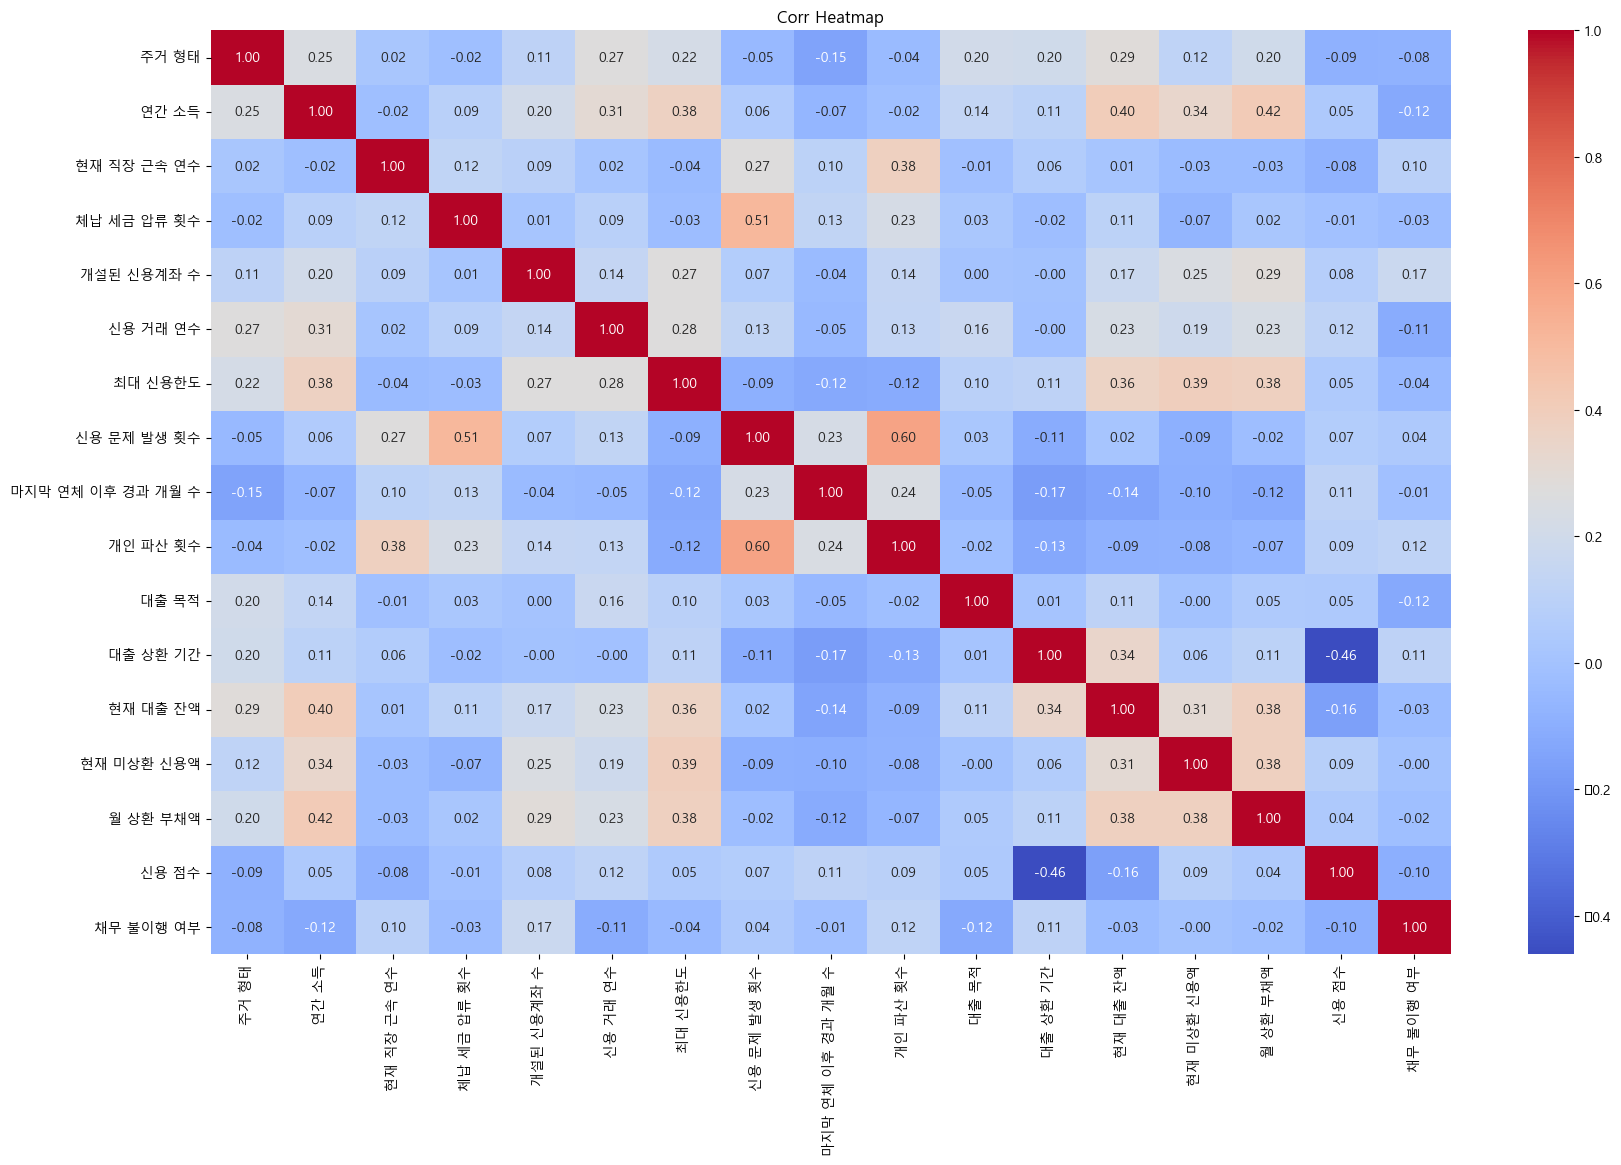

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv").drop(['UID'], axis=1)

# 범주형 열 지정
categorical_col = [
    '주거 형태',
    '대출 목적',
    '대출 상환 기간',
    '현재 직장 근속 연수'
]

# LabelEncoder를 이용한 범주형 변수 변환
encoder = LabelEncoder()
data[categorical_col] = data[categorical_col].apply(encoder.fit_transform)

# 상관 행렬 계산
corr = data.corr()

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 히트맵 그리기
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Corr Heatmap')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

data = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\train.csv")

test = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\test.csv")

redata = data[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '개인 파산 횟수','대출 상환 기간', '신용 점수']]

data.drop(['UID', '현재 직장 근속 연수','대출 목적'], axis =1, inplace=True)

re_real_test = test[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '개인 파산 횟수','대출 상환 기간', '신용 점수']]

encoder_loan_pd = LabelEncoder()

redata['대출 상환 기간'] = encoder_loan_pd.fit_transform(redata['대출 상환 기간'])

re_real_test['대출 상환 기간'] = encoder_loan_pd.transform(test['대출 상환 기간'])

label = data['채무 불이행 여부']

xgb = xgb.XGBClassifier()

cross_score = cross_val_score(xgb, redata, label, cv = 5)

xgb.fit(redata, label)

a=xgb.predict_proba(re_real_test)

print(f'교차검증 점수 :{cross_score}, 예측 확률 : {a}')

sample = pd.read_csv(r"C:\Users\302-28\Desktop\dacon\open\sample_submission.csv")

sample['채무 불이행 확률'] = a[:,1]

sample.to_csv('result_xgb.csv', index= False)